

https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908 


Team members:
1. Alexandre Pelegrina
2. Marc Vivas
3. Svyatoslav Gudymyak



# Imports

In [ ]:
#@title#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 11.6 MB/s 
     |████████████████████████████████| 16.7 MB 463 kB/s 
     |████████████████████████████████| 6.3 MB 49.4 MB/s 


In [ ]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.6 MB/s 


In [ ]:
%cd drive/MyDrive/IA\ projecte\ final
%ls

/content/drive/.shortcut-targets-by-id/15ltD9Cp6ftEBkCvzSpTQ5CwjIvVHrF-U/IA projecte final
'Airplane_Crashes_and_Fatalities_Since_1908 (1).gsheet'
 Airplane_Crashes_and_Fatalities_Since_1908.csv
 Airplane_Crashes_and_Fatalities_Since_1908.gsheet
 dataset_with_coords.csv
 dataset_with_route_coords.csv
'Esquema presentació..gdoc'
 IA_Project_2
 IA_Project_3
 IA_Project_4
 IA_Project.ipynb
 IA_Project_second_submission.ipynb
'Large_Passenger_Plane_Crashes_1933_to_2009 2.csv'
 Prac1_ML_Scenario_min_svyatoslav_gudymyak.ipynb
'Presentacio FInal Programacio avançada en IA.pptx'
'Treball final ia.gdoc'


In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
from selenium.webdriver.common.by import By


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 983 kB 21.8 MB/s 
     |████████████████████████████████| 138 kB 38.2 MB/s 
     |████████████████████████████████| 358 kB 51.6 MB/s 
     |████████████████████████████████| 55 kB 4.8 MB/s 
     |████████████████████████████████| 4.0 MB 38.2 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://s

In [ ]:
#@title
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objects as go
import requests
import scipy
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from google.colab import drive
from os import sep
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

# Encoders
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder



/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Functions

In [ ]:
def death_percentage(data):
  if data['Fatalities'] == data['Aboard']:
    return 0
  return 1 

In [ ]:
def death_quantiles(data):
  if data < 3:
    return 1
  elif data >= 3 and data < 10:
    return 2
  elif data >= 10 and data < 29:
    return 3    
  return 4

In [ ]:
def death_quantiles_2(data):
  if data <10:
    return 0 
  return 1

In [ ]:
def classification_evaluation(model, x_test, y_test):
  y_pred = model.predict(x_test)

  plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
  print("")
  print(f' Accuracy: {accuracy_score(y_test, y_pred) * 100}%')
  
  print(f' F1_score (>= 10 died): {f1_score(y_test, y_pred, )}')
  print(f' Precision (>= 10 died): {precision_score(y_test, y_pred, )}')
  print(f' Recall (>= 10 died): {recall_score(y_test, y_pred)}')

  fun = lambda data: 0 if data else 1
  y_test = y_test.apply(fun)
  for i in range(len(y_pred)):
    y_pred[i] = fun(y_pred[i])
  print(f' F1_score (< 10 died): {f1_score(y_test, y_pred, )}')
  print(f' Precision (< 10 died): {precision_score(y_test, y_pred, )}')
  print(f' Recall (< 10 died): {recall_score(y_test, y_pred)}')
  plt.show()

In [ ]:
def classification_evaluation_nn(model, x_test, y_test):
  y_pred = model.predict(x_test)
   
  for i in range(len(y_pred)):
    y_pred[i][0] = round(y_pred[i][0])
    if y_pred[i][0] <0:
      y_pred[i][0] = 0
    elif y_pred[i][0] >1:
      y_pred[i][0] = 1
    
   

  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
  cm = confusion_matrix(y_test, y_pred)  
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(
        cmap=plt.cm.Blues,
  ) 

  print("")
  print(f' Accuracy: {accuracy_score(y_test, y_pred) * 100}%')
  
  print(f' F1_score (>= 10 died): {f1_score(y_test, y_pred, )}')
  print(f' Precision (>= 10 died): {precision_score(y_test, y_pred, )}')
  print(f' Recall (>= 10 died): {recall_score(y_test, y_pred)}')

  fun = lambda data: 0 if data else 1
  y_test = y_test.apply(fun)
  for i in range(len(y_pred)):
    y_pred[i] = fun(y_pred[i])
  print(f' F1_score (< 10 died): {f1_score(y_test, y_pred, )}')
  print(f' Precision (< 10 died): {precision_score(y_test, y_pred, )}')
  print(f' Recall (< 10 died): {recall_score(y_test, y_pred)}')
  plt.show()

# Data loading

In [ ]:
df_raw = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df_raw.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [ ]:
df_raw.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


# Data understanding


##Project name
Machine learning _ Airplane Crashes Since 1908

##Project link
- https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908

##Amount of data:
- Total: 5268 rows 
- Train dataset: 4214 rows 
- Test dataset: 1054 rows

##Size of export
- Total: 1600 kB
- Train dataset:  1280 kB
- Test dataset: 320 kB

##Objective of the system
- We are going predict the Fatalities column.

##Features of the system
-All the features provided in this problematic are: 
Date, Time, ,Location, Operator, Flight#,Route,Type,Registration,cn/In, Aboard, Ground, Summary.

##Preliminary features inspection
- Date: 
Definition: date of the accident
Typology: independent, attribute, continuous 
Implication: an older date could implicate less security, and therefore more casualties

- Time: time of the day of the accident
 - Typology: independent, attribute, continuous
 - Implication: different conditions of the day could affect the flight
 

- Location: 

  - Definition: location of the accident
  - Typology: independent, attribute, categorical
  - Implication: the conditions of the terrain and climate could affect casualties


- Operator: 

  - Definition: Airline or operator of the airline
  - Typology: independent, attribute, categorical.
  - Implication: maybe a specific airline has more accidents because of how they take care of the aircraft.

- Flight #: 

  - Definition: Flight number assigned by Operator
  - Typology: independent, attribute, categorical
  - Implication: a specific flight might be more dangerous

- Route: 
 - Definition: Route flown prior to accident
 - Typology: independent, attribute, categorical
 - Implication: a specific route might be more dangerous

- Aircraft type:
 - Definition: aircraft type
 - Typology: independent, attribute, categorical
 - Implication: different models may have different safety levels

- Registration:

 - Definition: ICAO registration of aircraft
 - Typology: independent, attribute, categorical 
 - Implication: has no implication to the fatalities, as it’s an independent number.

- cn.in:

  - Definition: Aircraft serial number or line fuselage number
  - Typology: independent, attribute, categorical
  - Implication:

- Aboard: 

  - Definition: Total people aboard the aircraft
  - Typology: independent, attribute, discrete
  - Implication: the number of fatalities will depend on the number of people aboard.

- Fatalities: 

  - Definition: Total fatalities aboard the aircraft
  - Typology: independent, attribute, discrete
  - Implication: It is related to fatalities

- Ground: 

  - Definition: Total killed on the ground
  - Typology: dependent, attribute, discrete
  - Implication: Part of the number of fatalities related to each flight.

- Summary: 

  - Definition: Brief description of the accident
  - Typology: Independent, Attribute, Categorical.
  - Implication: Has a direct relation with the fatalities as it explains the successes that caused the accident.


##Potential drawbacks
- It is known that some of the columns of this dataset may not be useful at all as they contain serial numbers which we’ll have to drop because they are not going to provide us useful information.
- We also noticed some of the columns contain a notable percentage of null values.  

##Initial hypothesis
- To build our initial loop of our Final Project we will start with this hypothesis: 
> 1. Some types of aircraft may be less safe than others, resulting in a greater chance of death. 
> 2. The location of the plane accident may have influence on the objective column. For instance, if the plane crashed on the middle of the ocean, there may be a higher probability of death.




In [ ]:
df_plot = df_raw.copy(deep=True)
df_plot['Survivors'] = df_plot.apply(lambda data: data['Aboard'] - data['Fatalities'],axis=1)

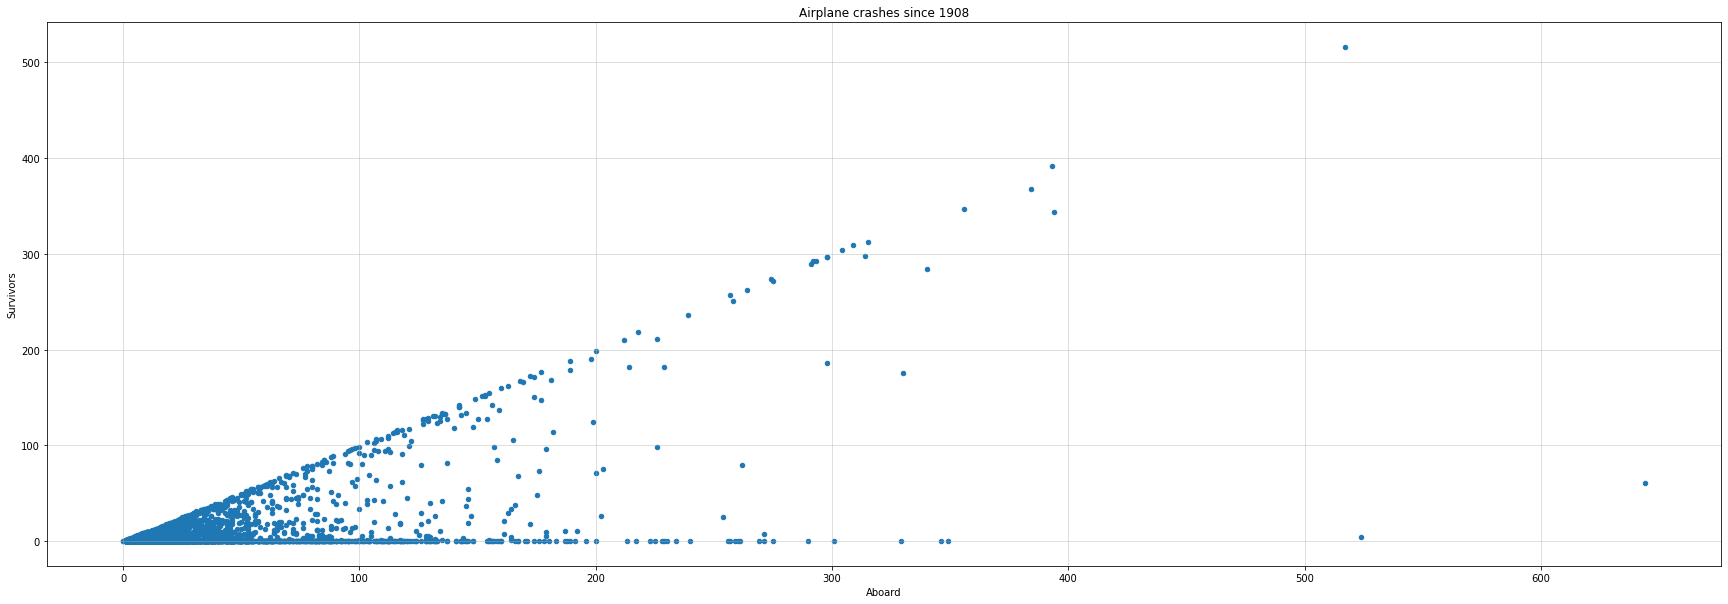

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(30,10))

# plot points
df_plot.plot.scatter(x="Aboard", y='Survivors', 
        title=f"Airplane crashes since 1908", rot=0,
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

It seems that is common that the number of survivors is low. 

# Data preparation (0)

**WARNING**

**This section explains how we prepared part of the data. However, we don't recommend executing it, since it will take a long time. The dataset provided has already undergone this procedure, so the purpose of including this section is mainly explanatory. Commenting or deleting "%%script echo skipping" will allow the cells to execute**

We will drop the following columns:
 >- Flight #: Each company assigns a flight number with the number they prefer, so this column is useless.
 >- Summary: We don't have the skills to use this column.
 >- Registration: It's a unique identifier for planes.
 >- cn/In: It is the construction number given by manufacturers so that the plane's entire history can be traced in the event that the registration is changed, which isn't uncommon. It's also unique for each plane.
 >- Ground: This is the number of people who died on the ground. We can't use this data because it's like having the solution written on the query.

In [ ]:
%%script echo skipping
df_raw = df_raw.drop(["Flight #", "Summary", "Registration", "cn/In", "Ground"], axis=1)
df_raw =df_raw.dropna()
df_raw.dropna().info()

skipping


In [ ]:
%%script echo skipping
display(df_raw.loc[df_raw['Route'].duplicated()])


skipping


Now, in order to improve the quality of the data, we will get the coordinates from the location column.

We've tried to use some libraries (geocoder, geopy) that use some APIs to get coordinates. However, the results weren't good, there were many locations that were wrong, such as "La Corunda, Spain", "PacifiOcean", "Near Tiflies, Georgia, USSR"... The libraries weren't able to give us any coordinates for this wrong values. 

After that, we figured out that google maps gave us the correct coordinates for all this wrong locations. We found out that google provides also their own API that uses googlemaps. Unfortunately, we had to pay if we wanted to use this service, so that was also not an option.

And finally, an idea came to us. We could use a web scraper to get the coordinates directly from google maps! And that's what we did, in the Web Project subject, we acquired a valious knowledge that was very useful for this situation. 

In [ ]:
%%script echo skipping
# Web scraping
def locToLatLong_googlemaps(location):
    try:
      url = "https://www.google.com/maps?q="+ location.replace(" ", "+") + "&hl=es"
      browser.get(url)
      url_with_coordinates = browser.find_element(by=By.CSS_SELECTOR, value='meta[itemprop=image]').get_attribute('content')  # Get coordinates without having to wait
      coordinates = url_with_coordinates.split('?center=')[1].split('&zoom=')[0].split('%2C')
      #print(data)
      #print(browser.current_url)
      #print(coordinates)
      return coordinates[0] + " " + coordinates[1]
    except:
      # Location not found
      print(location + "NOT FOUND")
    

skipping


In [ ]:
%%script echo skipping
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
location = df_raw.copy(deep=True)
location['Coordinates'] = location["Location"].apply(locToLatLong_googlemaps)

skipping


In [ ]:
%%script echo skipping
location['latitude'] = location['Coordinates'].apply(lambda coords: coords.split(' ')[0])
location['longitude'] = location['Coordinates'].apply(lambda coords: coords.split(' ')[1])
display(location)

skipping


We are going to merge the Date and Time columns into a single one that will contain the Date expressed in Years.

In [ ]:
%%script echo skipping
# Some time values were wrong, this function fix them
def fix_time(data):
  if data == '0943':
    data = '09:43'
  data = data+":00"
  data = data.replace("c: ", "0")
  data = data.replace("c:", "")
  data = data.replace("c", "")
  data = data.replace("'", ":")
  data = data.replace(".", ":")
    
  if len(data)<8:
    data = "0"+data
  return data

skipping


In [ ]:
%%script echo skipping
def date_to_years(data):
  total_years = 0
  (hour, minute, seconds) = data['Time'].split(':')
  (month, day, year) = data['Date'].split('/')

  minutes = float(minute) + float(seconds) / 60
  hours = minutes / 60 + float(hour)
  days = hours / 24 + float(day)
  years = days / 365.25 + float(month) / 12  + float(year)
  return years 

skipping


In [ ]:
%%script echo skipping
time = location.copy(deep=True)
time['Time'] = time['Time'].apply(fix_time)
time['Date_in_years'] = time.apply(date_to_years, axis=1)
display(time)

skipping


We will save the dataset because it takes a lot of time to transform the location column. 

In [ ]:
%%script echo skipping
coords_dataset = time.copy(deep=True)
coords_dataset.to_csv('./coords_test.csv')

skipping


We'll also transform Route into 5 more columns.

1. from_latitude
2. from_longitude
3. dest_latitude
4. dest_longitude
5. route_distance_km 

Values like "Sightseeing", "Test-flight", "Demonstration" will have the same coordinates as the location crash coordinates.

In [ ]:
%%script echo skipping
# Web scraping
def routeToLatLong_googlemaps(location):
    try:
      route = location['Route'].split(' - ')
      if len(route) == 1:
        url = "https://www.google.com/maps?q="+ location['Location'].replace(" ", "+") + "&hl=es"
        browser.get(url)
        url_with_coordinates = browser.find_element(by=By.CSS_SELECTOR, value='meta[itemprop=image]').get_attribute('content')  # Get coordinates without having to wait
        from_coordinates = url_with_coordinates.split('?center=')[1].split('&zoom=')[0].split('%2C')
        destination_coordinates = from_coordinates

      elif len(route) >= 2:
        if(len(route[0]) == 2):
          route[0] = route[1]
        url = "https://www.google.com/maps?q="+ route[0].replace(" ", "+") + "&hl=es"
        browser.get(url)
        url_with_coordinates = browser.find_element(by=By.CSS_SELECTOR, value='meta[itemprop=image]').get_attribute('content')  # Get coordinates without having to wait
        from_coordinates = url_with_coordinates.split('?center=')[1].split('&zoom=')[0].split('%2C')
        if(len(route[-1]) == 2):
          # Some words were like this al-ala...
          route[-1] = route[-2]
        url = "https://www.google.com/maps?q="+ route[-1].replace(" ", "+") + "&hl=es"
        print(route[-1] + route[0])
        browser.get(url)
        url_with_coordinates = browser.find_element(by=By.CSS_SELECTOR, value='meta[itemprop=image]').get_attribute('content')  # Get coordinates without having to wait
        destination_coordinates = url_with_coordinates.split('?center=')[1].split('&zoom=')[0].split('%2C')
      #print(data)
      #print(browser.current_url)
      #print(coordinates)
      return from_coordinates[0] + " " + from_coordinates[1] + "$" + destination_coordinates[0] + " " + destination_coordinates[1]
    except:
      # Location not found
      print(location['Route'] + " NOT FOUND")

skipping


In [ ]:
%%script echo skipping
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
route = df_raw.copy(deep=True)
route['Coordinates'] = route.apply(routeToLatLong_googlemaps, axis=1)

skipping


In [ ]:
%%script echo skipping
route.head()

skipping


In [ ]:
%%script echo skipping
route['from_latitude'] = route['Coordinates'].apply(lambda coords: coords.split('$')[0].split(' ')[0])
route['from_longitude'] = route['Coordinates'].apply(lambda coords: coords.split('$')[0].split(' ')[1])
route['dest_latitude'] = route['Coordinates'].apply(lambda coords: coords.split('$')[1].split(' ')[0])
route['dest_longitude'] = route['Coordinates'].apply(lambda coords: coords.split('$')[1].split(' ')[1])
display(route.head(6))

skipping


In [ ]:
%%script echo skipping
route_df = route.drop(['Operator', 'Fatalities', 'Location', 'Time', 'Date', 'Type', 'Route', 'Aboard', 'Coordinates'], axis=1)
display(route_df.head())

skipping


In [ ]:
%%script echo skipping
from geopy import distance
route_df['route_distance_km'] = route_df.apply(lambda data: distance.distance((data['from_latitude'], data['from_longitude']), (data['dest_latitude'], data['dest_longitude'])).km, axis=1) 
route_df.head()

skipping


In [ ]:
%%script echo skipping
coords_dataset = route_df.copy(deep=True)
coords_dataset.to_csv('./dataset_with_route_coords.csv')

skipping


# Data preparation (1)

In [ ]:
df_raw = pd.read_csv('dataset_with_coords.csv')
df_route = pd.read_csv('dataset_with_route_coords.csv')
df_raw.head()

,Unnamed: 0,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Coordinates,latitude,longitude,Date_in_years
0,0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,38.87980617 -77.08485921,38.879806,-77.084859,1908.798517
1,1,07/12/1912,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,39.37658991 -74.52286297,39.376590,-74.522863,1912.616929
2,80,12/23/1923,02:30:00,Over the Mediterranean Sea,Military - French Navy,Toulon - Algiers,Zeppelin Dixmunde (airship),52.0,52.0,36.6223748 -2.94457456,36.622375,-2.944575,1924.063256
3,96,09/03/1925,05:30:00,"Caldwell, Ohio",Military - U.S. Navy,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),43.0,14.0,39.74666808 -81.53237509,39.746668,-81.532375,1925.758841
4,119,08/22/1927,08:30:00,"Sevenoaks, England",KLM Royal Dutch Airlines,Croydon - Schiphol,Fokker F-VIII,11.0,1.0,51.27391988 0.15043205,51.273920,0.150432,1927.727869


We will drop Date, time coordinates and location columns because we have already treated them in Data Preparation (0).

In [ ]:
df_raw = df_raw.drop(["Route","Date", "Location", 'Time', "Coordinates","Unnamed: 0"], axis=1)
df_route = df_route.drop(['Unnamed: 0'], axis=1)


In [ ]:
display(df_raw.head())
df_route.head()


,Operator,Type,Aboard,Fatalities,latitude,longitude,Date_in_years
0,Military - U.S. Army,Wright Flyer III,2.0,1.0,38.879806,-77.084859,1908.798517
1,Military - U.S. Navy,Dirigible,5.0,5.0,39.376590,-74.522863,1912.616929
2,Military - French Navy,Zeppelin Dixmunde (airship),52.0,52.0,36.622375,-2.944575,1924.063256
3,Military - U.S. Navy,Dirigible ZR-1 Shenandoah (airship),43.0,14.0,39.746668,-81.532375,1925.758841
4,KLM Royal Dutch Airlines,Fokker F-VIII,11.0,1.0,51.273920,0.150432,1927.727869


,from_latitude,from_longitude,dest_latitude,dest_longitude,route_distance_km
0,38.879806,-77.084859,38.879806,-77.084859,0.000000
1,39.376590,-74.522863,39.376590,-74.522863,0.000000
2,43.136343,5.863399,36.738690,2.859144,755.195199
3,40.012857,-74.332690,38.653017,-90.383546,1390.186197
4,51.367807,-0.152279,52.301993,4.745450,353.159188


Now we have to merge df_raw with df_route

In [ ]:
df_raw['from_latitude'] = df_route['from_latitude']
df_raw['from_longitude'] = df_route['from_longitude']
df_raw['dest_latitude'] = df_route['dest_latitude']
df_raw['dest_longitude'] = df_route['dest_longitude']
df_raw['route_distance_km'] = df_route['route_distance_km']
display(df_raw.head())


,Operator,Type,Aboard,Fatalities,latitude,longitude,Date_in_years,from_latitude,from_longitude,dest_latitude,dest_longitude,route_distance_km
0,Military - U.S. Army,Wright Flyer III,2.0,1.0,38.879806,-77.084859,1908.798517,38.879806,-77.084859,38.879806,-77.084859,0.000000
1,Military - U.S. Navy,Dirigible,5.0,5.0,39.376590,-74.522863,1912.616929,39.376590,-74.522863,39.376590,-74.522863,0.000000
2,Military - French Navy,Zeppelin Dixmunde (airship),52.0,52.0,36.622375,-2.944575,1924.063256,43.136343,5.863399,36.738690,2.859144,755.195199
3,Military - U.S. Navy,Dirigible ZR-1 Shenandoah (airship),43.0,14.0,39.746668,-81.532375,1925.758841,40.012857,-74.332690,38.653017,-90.383546,1390.186197
4,KLM Royal Dutch Airlines,Fokker F-VIII,11.0,1.0,51.273920,0.150432,1927.727869,51.367807,-0.152279,52.301993,4.745450,353.159188


### Using quantiles to turn the problem into a classification problem

We will transform our problem into a classification problem. In this first iteration we will try to use quantiles to transform the Fatalities column. There will be 2 differents groups roughly equally distributed.
- Less than 10 fatalities (Not catastrophe) Encoded will be as 0
- More than 10 fatalities (Catastrophe) Encoded will be as 1


This modification will allow the ML model to get better predictions since we have reduced the number of possible answers.

In [ ]:
df_raw['Fatalities'].quantile([.5])

0.5    10.0
Name: Fatalities, dtype: float64

In [ ]:
df = df_raw.copy(deep=True)

df['Fatalities'] = df['Fatalities'].apply(death_quantiles_2)
display(df['Fatalities'].value_counts())

1    1315
0    1253
Name: Fatalities, dtype: int64

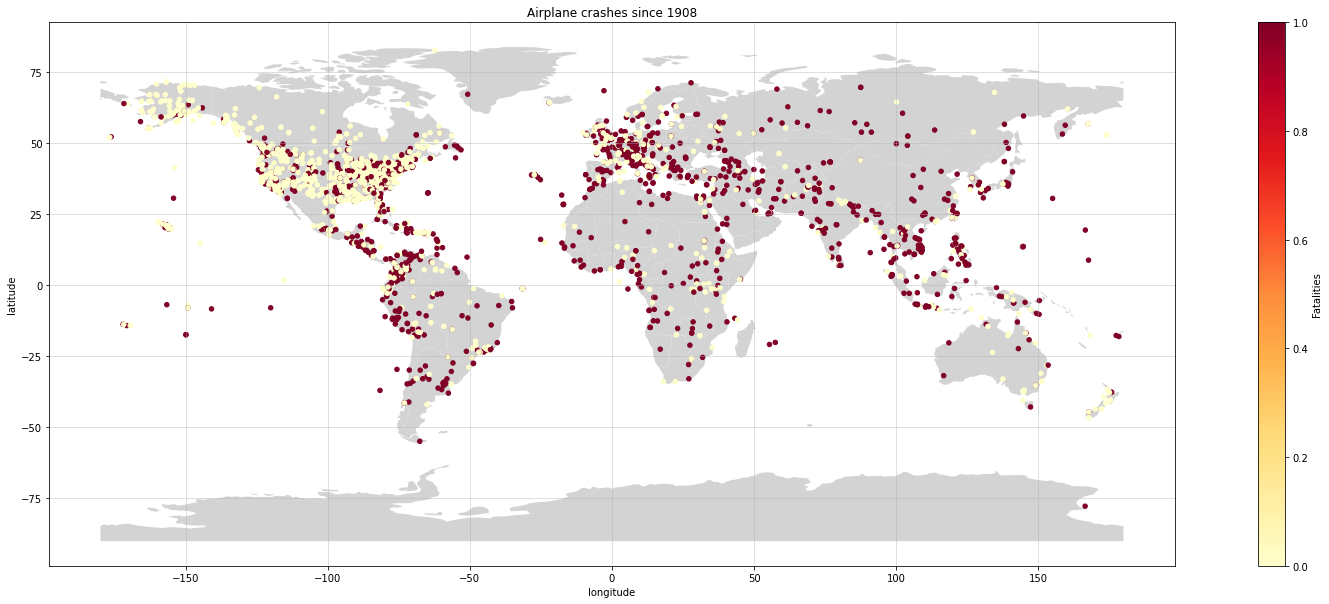

In [ ]:
import geopandas as gpd
# initialize an axis
fig, ax = plt.subplots(figsize=(30,10))
# plot map
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",ax=ax)

# plot points
df.plot(x="longitude", y="latitude", kind="scatter", 
        c="Fatalities", colormap="YlOrRd", title=f"Airplane crashes since 1908", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

It seems like in North America there're more small accidents than the rest of the world.

###Encoding of operator and type columns.

In [ ]:
df_raw['Type'].value_counts()

Douglas DC-3                                126
de Havilland Canada DHC-6 Twin Otter 300     38
Douglas DC-6B                                22
Douglas DC-4                                 18
Douglas C-47                                 16
                                           ... 
Lockheed L-1011 TriStar1                      1
Convair CV-880 / McDonnell DC-9-31            1
Cessna 320E                                   1
Convair CV-990-30A-5 Coronado                 1
Britten-Norman BN-2A-27 Islander              1
Name: Type, Length: 1468, dtype: int64

In [ ]:
print(f' Total duplicated aircraft type {len(df_raw[df_raw["Type"].duplicated() == True])}')
print(f' Total non duplicated aircraft type {len(df_raw[df_raw["Type"].duplicated() == False])}')

 Total duplicated aircraft type 1100
 Total non duplicated aircraft type 1468


In [ ]:
print(f' Total duplicated operators {len(df_raw[df_raw["Operator"].duplicated() == True])}')
print(f' Total non duplicated operators {len(df_raw[df_raw["Operator"].duplicated() == False])}')

 Total duplicated operators 1028
 Total non duplicated operators 1540


There's a big problem, there are a lot of categories. There are also many categories that aren't duplicated which is also bad. During the test, the model would find categories that has never seen.

We thought that Type column could be reduced into different categories of aircrafts (dirigible, cargo planes, air taxi, helicopter...), but we couldn't do it because we don't have any idea of how to extract this information only from the name. There were some names and summaries that contained this information, for instance "Dirigible ZR-1 Shenandoah (airship)", but this were the minority and wasn't enough. 

Otherwise, we also don't have any thoughts of how to reduce the operator column.  

For now, we won't be using one hot encoder because there are a lot of categories and the performance during training would be bad. 

Instead, we will use label encoder.

In [ ]:
#df = pd.get_dummies(df_raw, columns=['Operator', 'Type'])
#df.head()
label = LabelEncoder()

df['Type'] = label.fit_transform(df['Type'])
df['Operator'] = label.fit_transform(df['Operator'])

df.head()

,Operator,Type,Aboard,Fatalities,latitude,longitude,Date_in_years,from_latitude,from_longitude,dest_latitude,dest_longitude,route_distance_km
0,959,1411,2.0,0,38.879806,-77.084859,1908.798517,38.879806,-77.084859,38.879806,-77.084859,0.000000
1,965,692,5.0,0,39.376590,-74.522863,1912.616929,39.376590,-74.522863,39.376590,-74.522863,0.000000
2,907,1419,52.0,1,36.622375,-2.944575,1924.063256,43.136343,5.863399,36.738690,2.859144,755.195199
3,965,693,43.0,1,39.746668,-81.532375,1925.758841,40.012857,-74.332690,38.653017,-90.383546,1390.186197
4,766,887,11.0,0,51.273920,0.150432,1927.727869,51.367807,-0.152279,52.301993,4.745450,353.159188


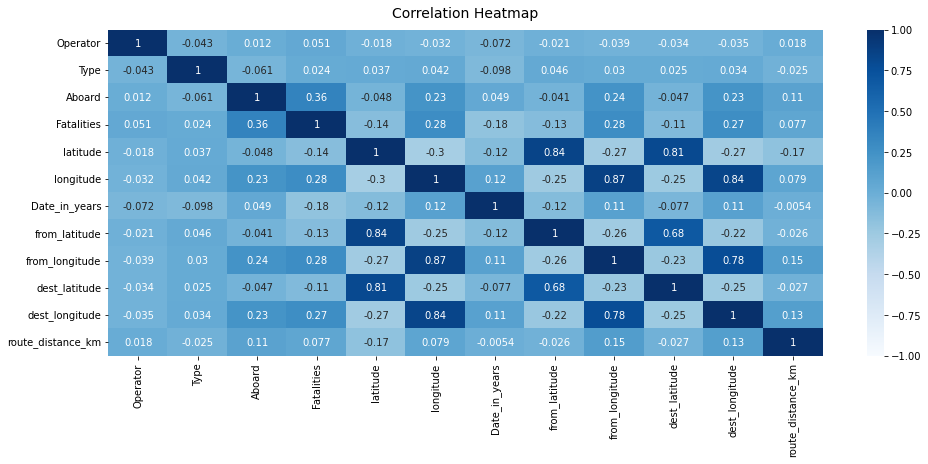

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

# Modeling and evaluation (1) - Baseline




In [ ]:
LR = LogisticRegression(max_iter=1000000)
x = df.drop('Fatalities',axis=1)
#x = x.drop('Aboard', axis=1)
y = df['Fatalities']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000000)


 Accuracy: 71.59533073929961%
 F1_score (>= 10 died): 0.7137254901960784
 Precision (>= 10 died): 0.7811158798283262
 Recall (>= 10 died): 0.6570397111913358
 F1_score (< 10 died): 0.718146718146718
 Precision (< 10 died): 0.6619217081850534
 Recall (< 10 died): 0.7848101265822784


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


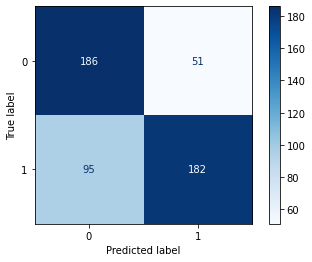

In [ ]:
classification_evaluation(LR, x_test, y_test)

> <u>__Current iteraion__:</u>
> - __ML model used__:  Logistic regression 
> - __Performance evaluation__:  
>> - Precision (>= 10 died): the model was able to predict well 77% of (>= 10 died) that were actually from (>= 10 died). 
>> - Recall (>= 10 died): from all the classes (>= 10 died) predictions, how many we Predicted correctly? 71% of the predictions were correct. A 29% of all classes (>= 10 died) predictions were actually (< 10 died). 
>> - F1_score (>= 10 died): 0.74 (1 is the best possible score)
>> - Precision (< 10 died): the model was able to predict well 73% of (< 10 died) that were actually from (< 10 died). 
>> - Recall (< 10 died): from all the classes (< 10 died) predictions, how many we Predicted correctly? 79% of the predictions were correct. The 21% from all classes (< 10 died) predictions were actually (>= 10 died). 
>> - F1_score (< 10 died): 0.76 (1 is the best possible score)
>> - Accuracy: 75%
> - __Model Evaluation__: The model performed quite well. With a mean accuracy much higher than 50%, it's clear that it's not just randomly assigning values. However, it can still be improved, since it's still missing rougly 1/4 of the predictions.
>> 

> <u>__Next iteraion__:</u>

> - __Improvement ideas__: Try to use another ML algorithm. We'll be using DecisionTree.
> - __Hypothesis__: Logistic regression is not complex enough for this problem.
> - __Expected solution__: Overall improvment.

# Data preparation (2)

We will be using the same dataset, since the improvement will come in the shape of a better model

# Modeling and evaluation (2) 

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()


 Accuracy: 82.29571984435798%
 F1_score (>= 10 died): 0.8324125230202579
 Precision (>= 10 died): 0.849624060150376
 Recall (>= 10 died): 0.8158844765342961
 F1_score (< 10 died): 0.8123711340206186
 Precision (< 10 died): 0.7943548387096774
 Recall (< 10 died): 0.8312236286919831


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


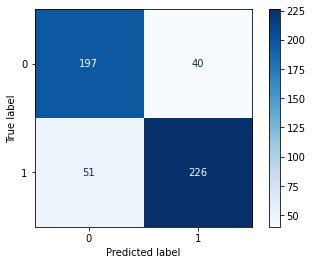

In [ ]:
classification_evaluation(tree, x_test, y_test)


> <u>__Current iteration__:</u>
> - __ML model used__: Decision Tree Classifier
> - __Performance evaluation__:  
>> - Precision (>= 10 died): the model was able to predict well 83% of (>= 10 died) that were actually from (>= 10 died). 
>> - Recall (>= 10 died): from all the classes (>= 10 died) predictions, how many we Predicted correctly? 85% of the predictions were correct. A xx% of all classes (>= 10 died) predictions were actually (< 10 died). 
>> - F1_score (>= 10 died): 0.84 (1 is the best possible score)
>> - Precision (< 10 died): the model was able to predict well 84% of (< 10 died) that were actually from (< 10 died). 
>> - Recall (< 10 died): from all the classes (< 10 died) predictions, how many we Predicted correctly? 82% of the predictions were correct. The xx% from all classes (< 10 died) predictions were actually (>= 10 died). 
>> - F1_score (< 10 died): 0.83 (1 is the best possible score)
>> - Accuracy: 83%
> - __Model Evaluation__: we can see that this new model is in fact much better than the previous one. For the accuracy score, it has a better score by around 10%. It can still be improved, but at around 80% accuracy it is much more reliable.

> <u>__Next iteraion__:</u>

> - __Improvement ideas__: Try to use another ML algorithm. We'll be using RandomForest.
> - __Hypothesis__: DecisionTree is not complex enough for this problem.
> - __Expected solution__: Overall improvment.

# Data preparation (3)

Once again, we will be using the same dataset, since the improvement will come in the shape of a better model

# Modeling and evaluation (3)

In [ ]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()


 Accuracy: 88.32684824902724%
 F1_score (>= 10 died): 0.898989898989899
 Precision (>= 10 died): 0.8422712933753943
 Recall (>= 10 died): 0.9638989169675091
 F1_score (< 10 died): 0.8617511520737328
 Precision (< 10 died): 0.949238578680203
 Recall (< 10 died): 0.7890295358649789


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


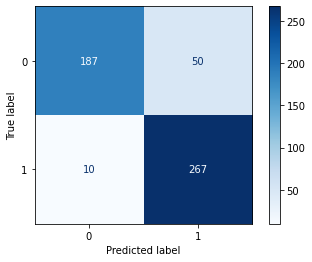

In [ ]:
classification_evaluation(forest, x_test, y_test)


> <u>__Current iteraion__:</u>
> - __ML model used__: Random forest classifier.
> - __Performance evaluation__:   
>> - Precision (>= 10 died): the model was able to predict well 82% of (>= 10 died) that were actually from (>= 10 died). 
>> - Recall (>= 10 died): from all the classes (>= 10 died) predictions, how many we Predicted correctly? 95% of the predictions were correct. A 29% of all classes (>= 10 died) predictions were actually (< 10 died). 
>> - F1_score (>= 10 died): 0.88 (1 is the best possible score)
>> - Precision (< 10 died): the model was able to predict well 94% of (< 10 died) that were actually from (< 10 died). 
>> - Recall (< 10 died): from all the classes (< 10 died) predictions, how many we Predicted correctly? 78% of the predictions were correct. The 21% from all classes (< 10 died) predictions were actually (>= 10 died). 
>> - F1_score (< 10 died): 0.85 (1 is the best possible score)
>> - Accuracy: 87%
> - __Model Evaluation__: Although the improvement is not as big as iteration 2 on iteration 1, it still performed better. Recall (>= 10 died) and Precision (< 10 died) even improved by rougly 10%. It's true that and Recall (< 10 died) performed a bit worse, by around 3%, and  Precision (>= 10 died) is pretty much the same, but such a small difference is probably just randomness, while the improvements are too significant for that to be the case, and the F1 scores and the accuracy also improved, so in general the model is better. With an accuracy of around 85%, the model is very good, and definetly the best of the three.

> <u>__Next iteraion__:</u>

> - __Improvement ideas__: Build another model using a neural network.
> - __Hypothesis__: RandomForest is not complex enough for this problem.
> - __Expected solution__: Overall improvement.

# DecisionTree tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split


# Define tuning scope:
#   - Each dict is a single grid combinatory search
#   - Multiple GridSearch can be encapsulated by using a list
scoring = ['accuracy']


param_grid = {'max_features': [5, 3, 7 ,10,],
              'max_depth' : [4, 5, 6, 7,],
              'criterion' :['gini', 'entropy']
             }
# Modeling
dtc = DecisionTreeClassifier()
# cv=5 : defaults to Strat. KFold
gs_tree = GridSearchCV(dtc, param_grid, cv=5,
                  scoring='accuracy', verbose=3)

gs_tree_output = gs_tree.fit(x_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=5;, score=0.910 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=5;, score=0.805 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=5;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=5;, score=0.861 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=5;, score=0.846 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=3;, score=0.920 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=3;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=3;, score=0.842 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=3;, score=0.832 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=3;, score=0.676 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth

In [ ]:
gs_tree_output.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=7)

In [ ]:
d_tree = gs_tree_output.best_estimator_
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



 Accuracy: 89.49416342412452%
 F1_score (>= 10 died): 0.9105960264900662
 Precision (>= 10 died): 0.8409785932721713
 Recall (>= 10 died): 0.9927797833935018
 F1_score (< 10 died): 0.8726415094339622
 Precision (< 10 died): 0.9893048128342246
 Recall (< 10 died): 0.7805907172995781


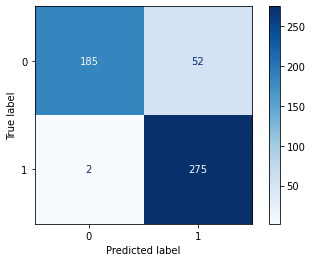

In [ ]:
classification_evaluation(d_tree, x_test, y_test)

We managed to achieve the same accuracy as the RandomForest model.

## Plotting the DecisionTree

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Index(['Operator', 'Type', 'Aboard', 'latitude', 'longitude', 'Date_in_years',
       'from_latitude', 'from_longitude', 'dest_latitude', 'dest_longitude',
       'route_distance_km'],
      dtype='object')


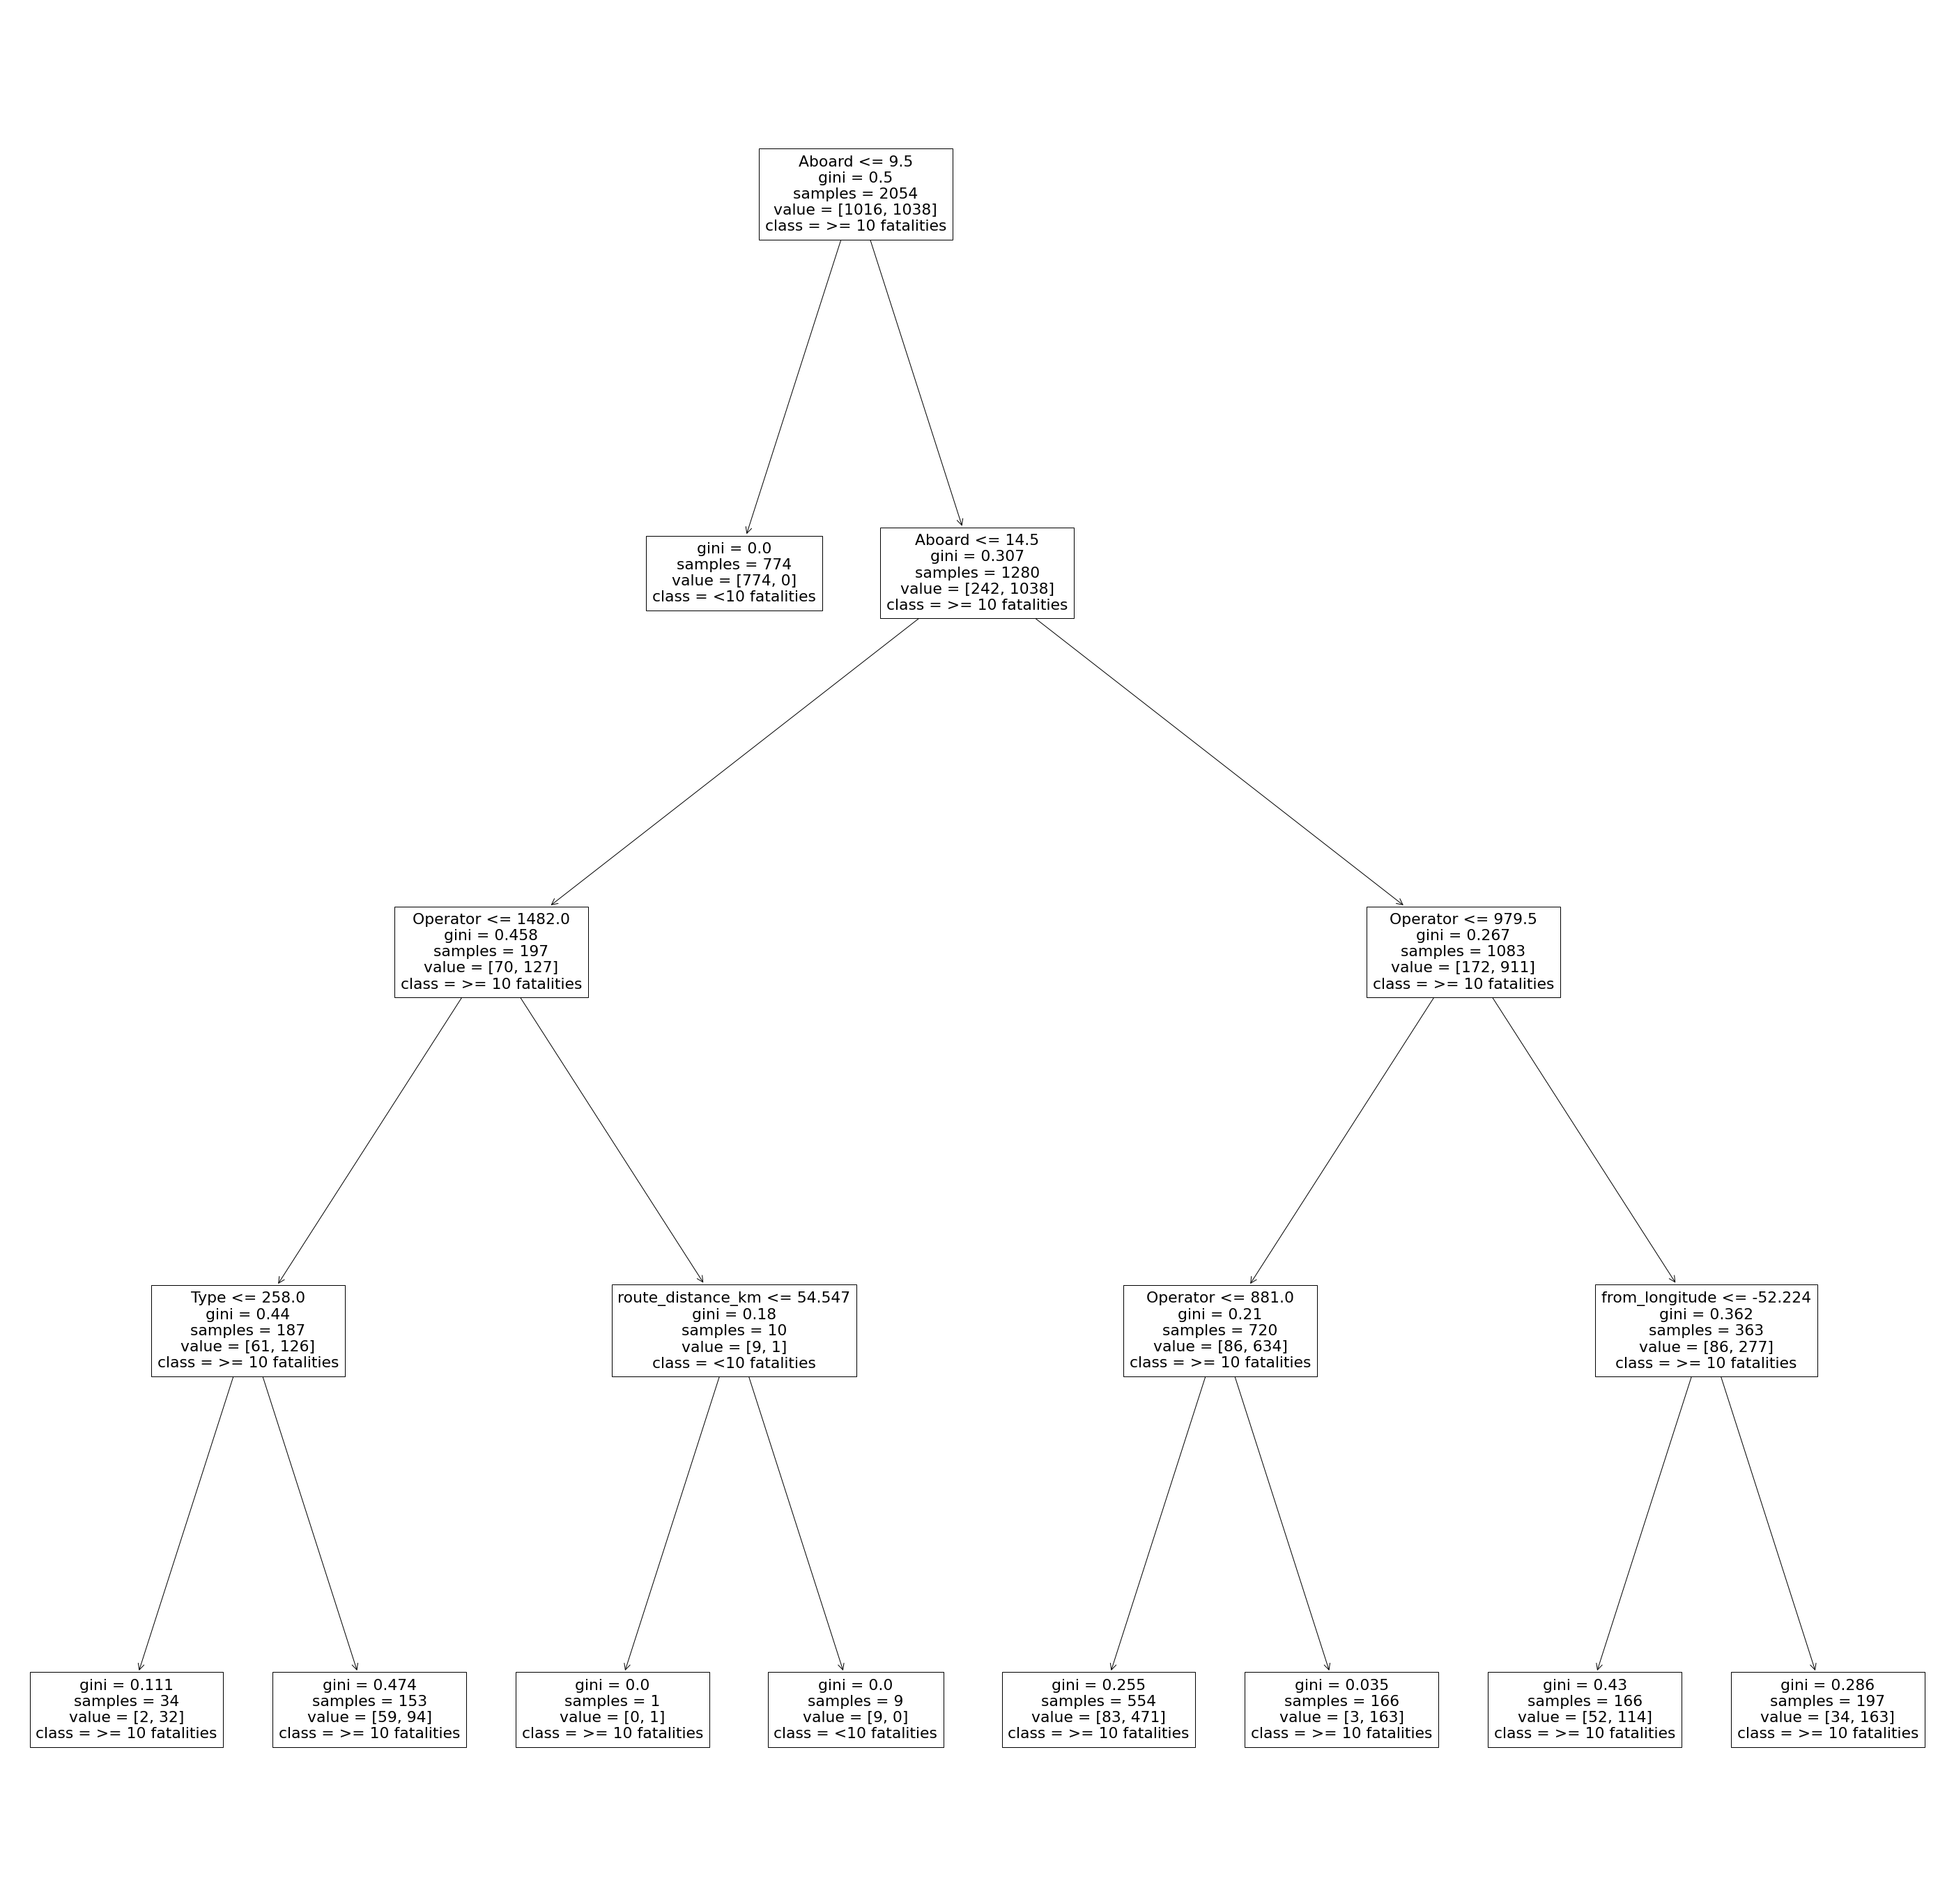

In [ ]:
from sklearn import tree


print(type(d_tree))

print(x.columns)
fig = plt.figure(figsize=(50, 50))
tree.plot_tree(d_tree, feature_names=x.columns, class_names=['<10 fatalities', '>= 10 fatalities'])
plt.show()

# RandomForest tuning

In [ ]:
rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}
gs_forest = GridSearchCV(rfc, param_grid, cv=5,
                  scoring='accuracy', verbose=3)

gs_forest_output = gs_forest.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.920 total time=   1.1s
[CV 2/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.871 total time=   1.1s
[CV 3/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.881 total time=   1.2s
[CV 4/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.864 total time=   1.5s
[CV 5/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.888 total time=   1.8s
[CV 1/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.920 total time=   2.8s
[CV 2/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.873 total time=   3.3s
[CV 3/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.883 total time=   3.5s
[CV 4/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.864 total time=   2.8s
[CV 5/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.883 total t

In [ ]:
gs_forest_output.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200)

In [ ]:
forest = gs_forest_output.best_estimator_
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200)


 Accuracy: 89.10505836575877%
 F1_score (>= 10 died): 0.9069767441860465
 Precision (>= 10 died): 0.84
 Recall (>= 10 died): 0.9855595667870036
 F1_score (< 10 died): 0.8685446009389671
 Precision (< 10 died): 0.9788359788359788
 Recall (< 10 died): 0.7805907172995781


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


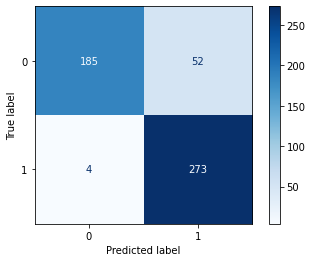

In [ ]:
classification_evaluation(forest, x_test, y_test)

Unfortunately, we weren't able to achieve more than 88% accuracy in any of the models.

# Extra iteration using a neural network

In this iteration we'll be using a neural network as a classifier model. 


- Number of input neurons: len(x.columns) = 11
- Number of hidden neurons (1 layer) = (2/3 * 11) + number of output neurons (1) = 9
 - Activation function: Relu
- Number of output neurons: 1 
 - Activation function: Sigmoid
- Optimizer: Adam
- Loss function: Binary cross entropy

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9, input_dim=len(x_train.columns), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.00895),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


65/65 [==============================] - 1s 2ms/step - loss: 36.7171 - accuracy: 0.5565
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 4.5804 - accuracy: 0.6276
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 2.6621 - accuracy: 0.6597
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 1.8273 - accuracy: 0.6835
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 1.1078 - accuracy: 0.7093
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 1.3745 - accuracy: 0.6456
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 1.1883 - accuracy: 0.6655
Epoch 8/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9727 - accuracy: 0.6840
Epoch 9/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9226 - accuracy: 0.6782
Epoch 10/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9249 - accuracy: 0.6782
Epoch 11/100
65/65 [


 Accuracy: 85.99221789883269%
 F1_score (>= 10 died): 0.8758620689655173
 Precision (>= 10 died): 0.8382838283828383
 Recall (>= 10 died): 0.9169675090252708
 F1_score (< 10 died): 0.8392857142857142
 Precision (< 10 died): 0.8909952606635071
 Recall (< 10 died): 0.7932489451476793


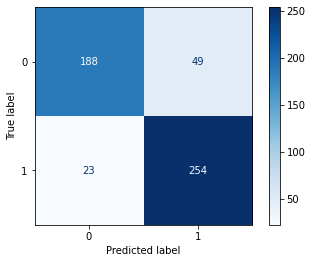

In [ ]:

classification_evaluation_nn(model, x_test, y_test)

> <u>__Current iteraion__:</u>
> - __ML model used__:  Neural newtork 
> - __Performance evaluation__: The best performance we achieved (couldn't save it because we hadn't set a random seed)
>> - Precision (>= 10 died): the model was able to predict well 79.81% of (>= 10 died) that were actually from (>= 10 died). 
>> - Recall (>= 10 died): from all the classes (>= 10 died) predictions, how many we Predicted correctly? 100% of the predictions were correct. A 0% of all classes (>= 10 died) predictions were actually (< 10 died). 
>> - F1_score (>= 10 died): 0.8877 (1 is the best possible score)
>> - Precision (< 10 died): the model was able to predict well 100% of (< 10 died) that were actually from (< 10 died). 
>> - Recall (< 10 died): from all the classes (< 10 died) predictions, how many we Predicted correctly? 73.9% of the predictions were correct. The 26.1% from all classes (< 10 died) predictions were actually (>= 10 died). 
>> - F1_score (< 10 died): 0.85 (1 is the best possible score)
>> - Accuracy: 88%
> - __Model Evaluation__: We did this iteration expecting an improvement but unfortunately it didn't improve.
>> 

# Final conclusions

> As we've seen on the DecisionTree plot, the model trusts on the number of people Aboard, but it doesn't completly assume that the number of people aboard is the solution, since it tries to find the cases where the column Aboard isn't the solution. 

> The trust that the model has of the number of people Aboard tells us that the odds of surviving are quite rare. Most aircraft accidents have a high percentage of fatalities.



> In some cases the model identifies that in America and mostly North America there are a lot of crashes where fatalities are low (less than 10). This is true as the graph below shows. However, we don't think this is because there's a higher probability of death but for some other reason.

> Hypothesis: We know that aircrafts were invented on USA, so then we suppose that in the begining, the aircrafts had fewer seats, were smaller, and the majority of the aircrafts were on USA. As a consequence, the majority of small plane crashes are located there. 


 
  




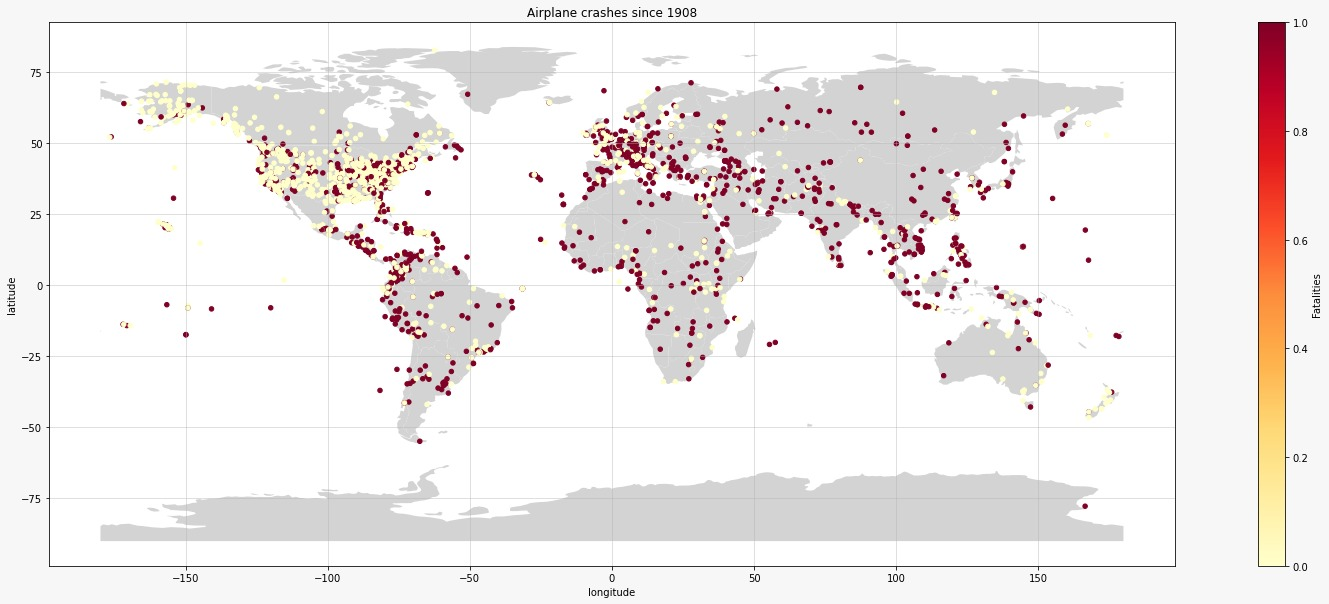